# Classifying Electrocardiograms

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_validate, train_test_split, cross_val_predict

## (1) Electrocardiograms

Each observation of the dataset is a sequence of measured heartbeats, taken from a patient's electrocardiogram (ECG).

The target is binary and defines whether the heartbeat shows:
* a risk of cardiovascular disease (1)
* or not (0)

In [3]:
data = pd.read_csv("../data/metrics/ML_Electrocardiograms_dataset.csv")

data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.994200,1.000000,0.951276,0.903712,0.917633,0.900232,0.803944,0.656613,0.421114,0.288863,...,0.294664,0.295824,0.301624,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.984472,0.962733,0.663043,0.211180,0.000000,0.032609,0.100932,0.177019,0.270186,0.313665,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.619217,0.489324,0.327402,0.110320,0.000000,0.060498,0.108541,0.108541,0.145907,0.192171,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
data.shape

(19565, 188)

In [6]:
data.describe()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
count,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,...,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000
mean,0.896572,0.767876,0.413719,0.197244,0.180303,0.193689,0.192769,0.192905,0.193743,0.197179,...,0.004113,0.003821,0.003485,0.003218,0.003049,0.002836,0.002471,0.002252,0.002218,0.074010
std,0.240958,0.220599,0.227000,0.189019,0.158124,0.160739,0.171927,0.174343,0.171893,0.170597,...,0.041312,0.040290,0.038035,0.036679,0.035847,0.034509,0.031731,0.030649,0.030541,0.261793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.933555,0.706215,0.236515,0.045845,0.077333,0.083333,0.068465,0.063291,0.061753,0.065844,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.994012,0.834135,0.416107,0.147410,0.138554,0.148276,0.137931,0.135029,0.140325,0.145933,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.914601,0.574230,0.301939,0.235033,0.264758,0.279221,0.282187,0.286506,0.287726,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.996198,1.000000,1.000000,1.000000,1.000000,0.991429,...,0.980392,1.000000,0.966102,1.000000,1.000000,0.973366,1.000000,0.996053,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19565 entries, 0 to 19564
Columns: 188 entries, x_1 to target
dtypes: float64(187), int64(1)
memory usage: 28.1 MB


## (2) Data Exploration

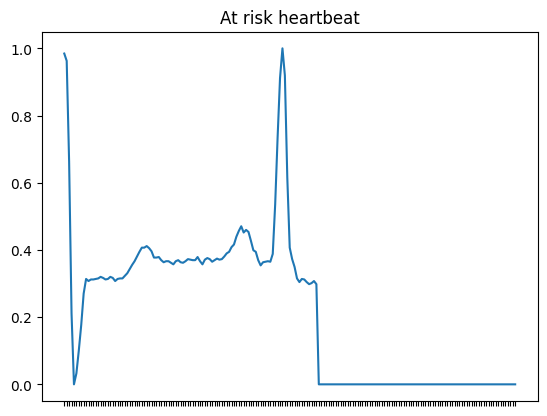

In [17]:
plt.plot(data.iloc[3, :-1])
plt.tick_params(labelbottom=False)
plt.title('At risk heartbeat')
plt.show()

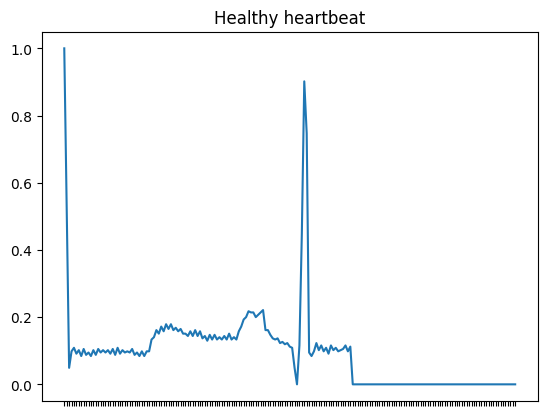

In [18]:
plt.plot(data.iloc[19560, :-1])
plt.tick_params(labelbottom=False)
plt.title('Healthy heartbeat')
plt.show()

In [26]:
healthy_count, at_risk_count = data['target'].value_counts()
print(healthy_count)
print(at_risk_count)

18117
1448


In [27]:
data.target.value_counts(normalize=True)

target
0    0.92599
1    0.07401
Name: proportion, dtype: float64

## (3) Logistic Regression

In [37]:
lr_model = LogisticRegression(max_iter=1000)
X = data.drop(columns=['target'])
y = data.target
cv_results = cross_validate(lr_model, X, y, cv=10,
                             scoring=['accuracy','recall','precision','f1'])
pd.DataFrame(cv_results)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.426984,0.009462,0.943281,0.358621,0.742857,0.483721
1,0.350601,0.009399,0.934594,0.248276,0.654545,0.360000
2,0.401826,0.011042,0.941237,0.379310,0.687500,0.488889
3,0.274976,0.009804,0.935105,0.303448,0.628571,0.409302
4,0.363516,0.010444,0.944303,0.379310,0.743243,0.502283
5,0.274059,0.010669,0.936094,0.337931,0.628205,0.439462
6,0.313479,0.010100,0.940184,0.344828,0.694444,0.460829
7,0.359626,0.009203,0.937628,0.324138,0.661972,0.435185
8,0.337469,0.009192,0.939162,0.305556,0.698413,0.425121
9,0.262973,0.010009,0.938139,0.305556,0.676923,0.421053


In [43]:
correct_pred_ratio = cv_results['test_accuracy'].mean()
flag_ratio = cv_results['test_recall'].mean()
correct_detection_ratio = cv_results['test_precision'].mean()
aggregated_metric = cv_results['test_f1'].mean()
print(correct_pred_ratio)
print(flag_ratio)
print(correct_detection_ratio)
print(aggregated_metric)

0.93897246839775
0.3286973180076628
0.6816674448188533
0.4425845215932295


In [44]:
print(f"You should have noticed that the model was able to predict correctly in {int(round(correct_pred_ratio,2)*100)} cases out of 100. ")

print(f"However, it was able to capture only {round(flag_ratio,2)*100} % of the at-risk patients")

print("Why ? Let's print a confusion matrix!")

You should have noticed that the model was able to predict correctly in 94 cases out of 100. 
However, it was able to capture only 33.0 % of the at-risk patients
Why ? Let's print a confusion matrix!


## (4) Confusion Matrix

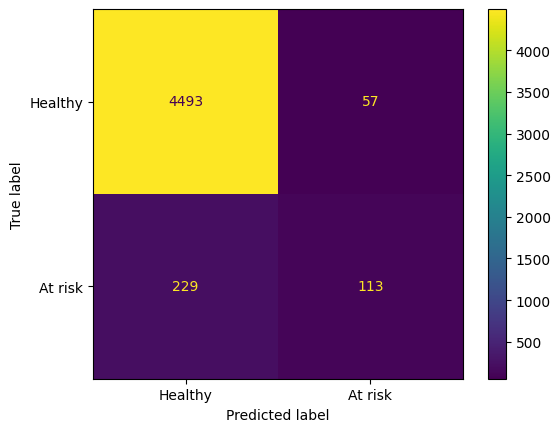

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)

predictions = LR.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'At risk'])
disp.plot()
plt.show()

--------------------------------------------------
Printing the confusion Matrix focusing on the Recall - the ability to capture classes


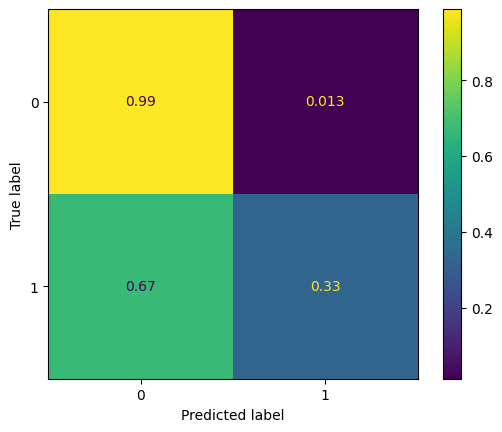

In [53]:
print("-"*50)
print("Printing the confusion Matrix focusing on the Recall - the ability to capture classes")
cm = confusion_matrix(y_test, predictions,
                     normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=LR.classes_)
disp.plot()

--------------------------------------------------
Printing the confusion Matrix focusing on the Precision - the ability to avoid false alarms


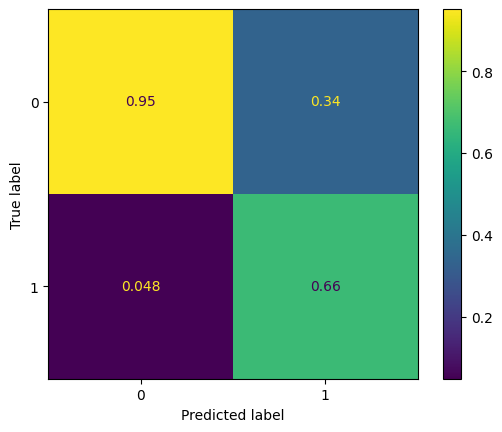

In [54]:
print("-"*50)
print("Printing the confusion Matrix focusing on the Precision - the ability to avoid false alarms")
cm = confusion_matrix(y_test, predictions,
                     normalize = 'pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=LR.classes_)
disp.plot()

## (5) KNN Classfier

In [56]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
cv_results = cross_validate(KNN_classifier, X, y, cv=10,
                            scoring=['accuracy', 'recall', 'precision', 'f1'])
correct_pred_ratio = cv_results['test_accuracy'].mean()
flag_ratio = cv_results['test_recall'].mean()
correct_detection_ratio = cv_results['test_precision'].mean()
aggregated_metric = cv_results['test_f1'].mean()
print(correct_pred_ratio)
print(flag_ratio)
print(correct_detection_ratio)
print(aggregated_metric)

0.9864040573767493
0.8680507662835248
0.9438330326255999
0.9041585493379827


## (6) Classification Report

In [58]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
predictions = KNN_classifier.predict(X_test)
print(classification_report(y_test, predictions, target_names=['Health', 'At Risk']))

              precision    recall  f1-score   support

      Health       0.99      0.99      0.99      4550
     At Risk       0.92      0.86      0.89       342

    accuracy                           0.99      4892
   macro avg       0.96      0.93      0.94      4892
weighted avg       0.98      0.99      0.99      4892



In [60]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
y_pred = cross_val_predict(KNN_classifier, X, y)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18117
           1       0.94      0.86      0.90      1448

    accuracy                           0.99     19565
   macro avg       0.96      0.93      0.94     19565
weighted avg       0.99      0.99      0.99     19565



In [ ]:
# Among the heartbeats predicted at-risk, what is the ratio of correct predictions?
# Is the precision metric for class 1 -> 0.94

## (7) Prediction

In [61]:
new_patient = pd.read_csv("../data/metrics/ML_Electrocardiograms_new_patient.csv")
new_patient.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187
0,0.904762,0.993197,1.0,0.956916,0.902494,0.857143,0.802721,0.777778,0.709751,0.557823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5).fit(X, y)
prediction = KNN_classifier.predict(new_patient)
prediction

array([1])